# Machine Learning Problem Statement

Retaining existing customers is one of the most important key performance indicators (KPIs) for businesses that operate using a subscription-based business model. 

The SaaS industry is particularly difficult to compete in because customers have the freedom to select from a large number of service providers. 

A single negative interaction is all it takes for a consumer to decide to switch to a competitor, resulting in customer churn.


The percentage of a company’s clientele that stops purchasing the company’s goods or services during a specified period of time is referred to as “customer churn.” One method for determining a company’s churn rate is to divide the total number of customers who cancelled their subscriptions during a specific time period by the total number of subscribers who were still active at the start of the period. For instance, if you had 1000 clients at the beginning of the month and lost 50 of them, your churn rate for the month would be 5%.


# Source 

https://www.kaggle.com/blastchar/telco-customer-churn

# Goal

Employee Attrition Prediction task to determine which employee could  gone




# Metrics
 
 
 F1 = 60% et Recall = 75% 

### Recall 

F1 is the ratio between precision and recall.

the reminder helps to minimize false negatives.

precision helps minimize false positives.

EXPLORATORY DATA ANALYSIS

Objectif:

Mieux comprendre nos données
pour etablir une stratégie de modélisation
Analyse de la forme :

Identification de la target : class
Classes légèrement équilibrés (1 un peu plus de 63 % , 0 un peu plus de 36 %)
Nombre de lignes et de colonnes :7043, 21 
Types de variables : qualitatives : 18  , quantitatives : 3

Analyse du fond :

Visualisation de la target (Histogramme / Boxplot)
Comprehension des différentes variables (Internet -- Kaggle discusion )
quelques variables continues standardisées , skewed (asymétriques) suivant une loi normale
Variable qualitative :elles ne sont pas binaire , ce sont des variables qui possèdent plusieurs categories 

 ** Relation Variables / Target **

Visualisation des relations variables -target(Histogramme/Boxplot)
Identification des outliers


Conclusion :

Une feature engineering avec les variables

In [3]:
## Load EDA
import polars as pl 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns   
from pathlib import Path
%matplotlib inline  


In [4]:
import polars as pl 

print(pl.__version__)

0.20.8


In [5]:
THIS_DIR : str = '../MLoPsMlflowDagshubPycaret'

CUSTOMER_CHURN_CSV_FPATH : str  = THIS_DIR  + '/data/customer_churn_data.csv'

In [7]:
#reader_features = pl.read_csv_batched(
    #CUSTOMER_CHURN_CSV_FPATH
#)  
#features_data = reader_features.next_batches(100)  


#features_data = pl.concat(features_data)

# data = pl.read_csv(CUSTOMER_CHURN_CSV_FPATH)

data = pd.read_csv(CUSTOMER_CHURN_CSV_FPATH)

In [8]:
#df = data.clone() polars 
df = data.copy()

In [9]:
# df.dtypes 
df.dtypes.value_counts()

object     18
int64       2
float64     1
Name: count, dtype: int64

In [ ]:

df.shape # Nombre de lignes , Nombre de colonnes : dimensionalite du dataset

(7043, 21)

In [10]:
df.dtypes.value_counts()



object     18
int64       2
float64     1
Name: count, dtype: int64

In [ ]:
df.dtypes.value_counts().plot.pie()

<Axes: >

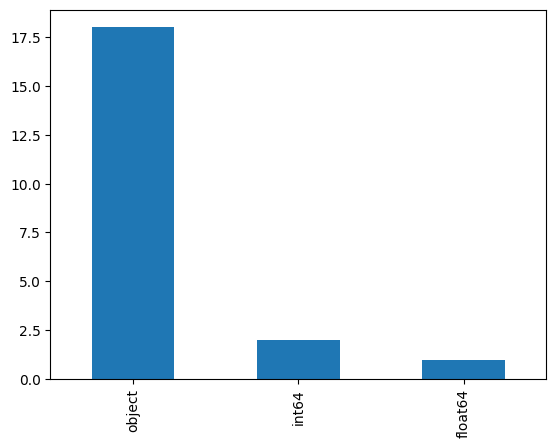

In [11]:
df.dtypes.value_counts().plot(kind = 'bar')

### Analyse des NaN

<Axes: >

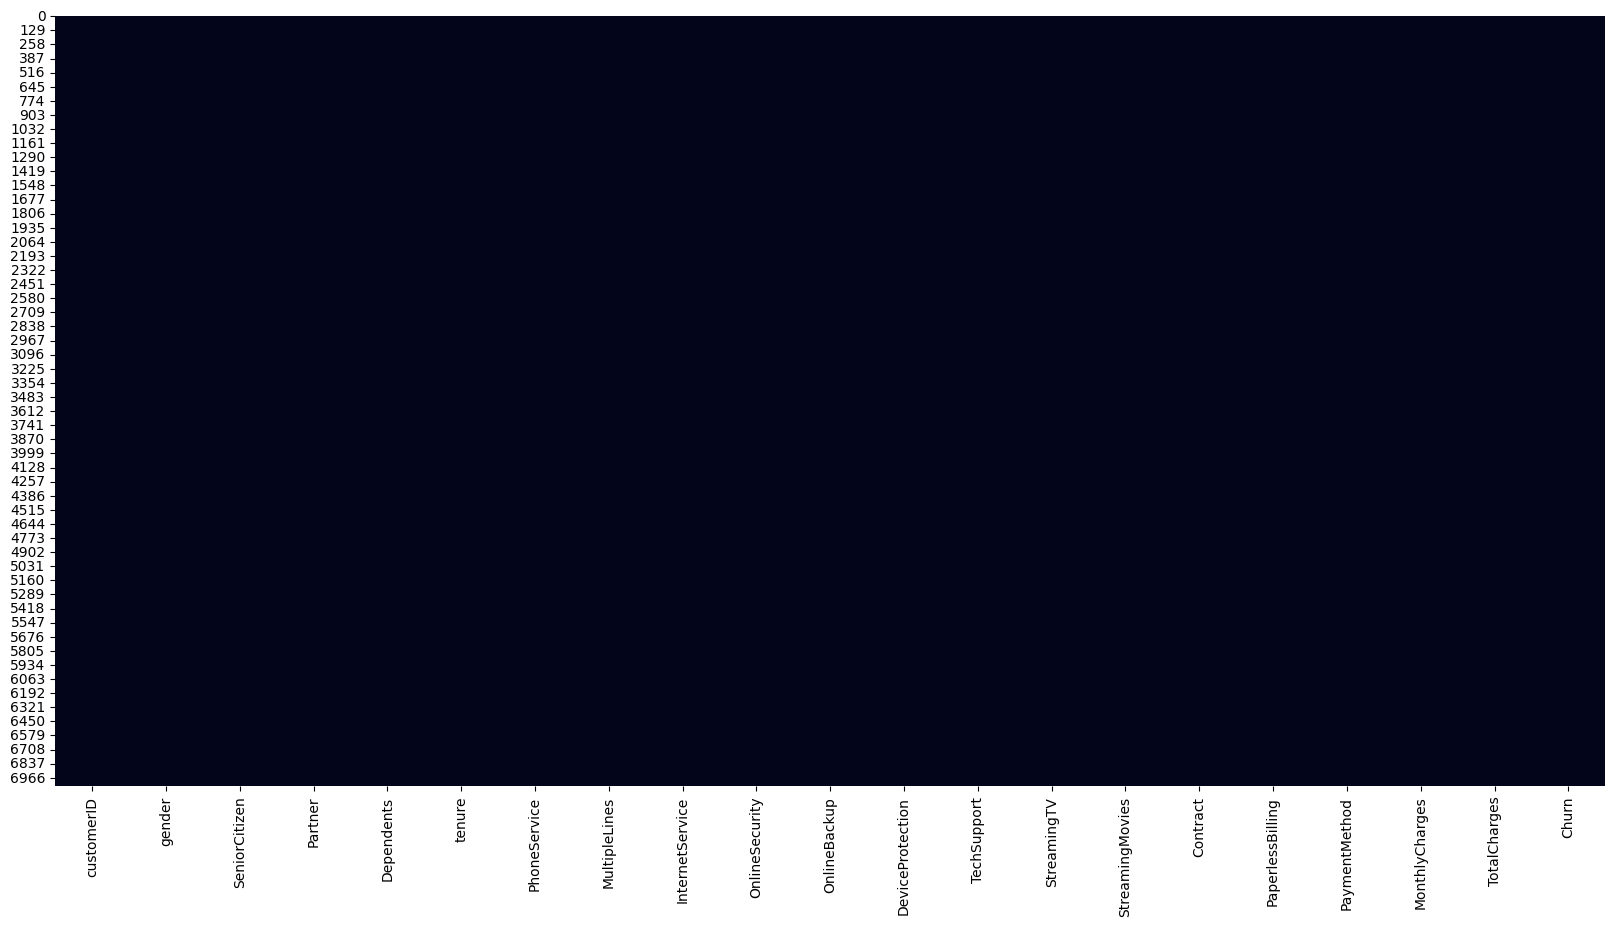

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isna() , cbar=False)

#### Mesurer le pourcentage de valeurs manquantes dans notre dataframe

In [13]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen       0.0
Churn               0.0
dtype: float64

# Analyse du fond
Examen de la colonne target

In [14]:
df['Churn'].value_counts(normalize =True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Churn'>

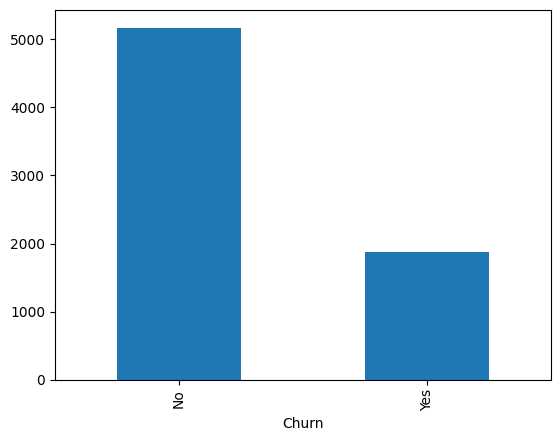

In [15]:
df['Churn'].value_counts().plot(kind="bar")

### Histogrammes des variables continues

SeniorCitizen
tenure


<Figure size 640x480 with 0 Axes>

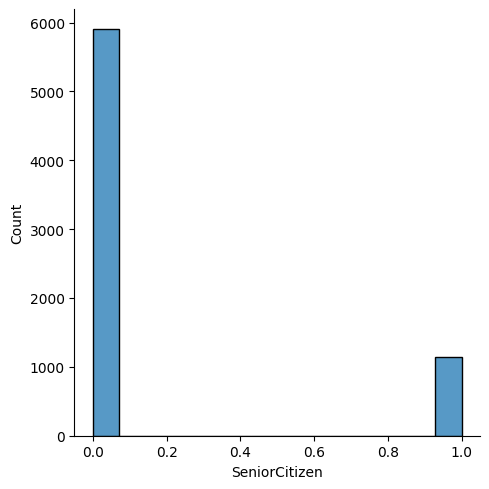

<Figure size 640x480 with 0 Axes>

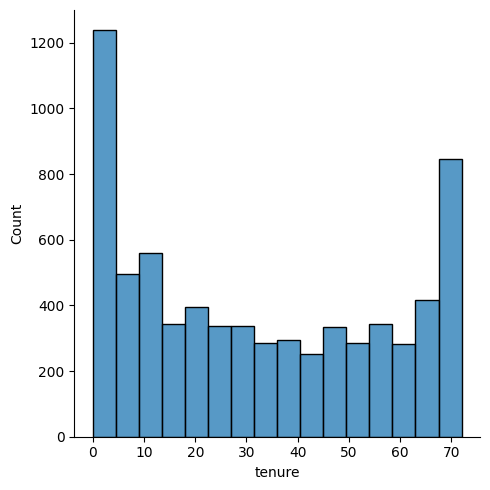

In [17]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.displot(df[col])
    print(col)

#### Variables qualitatives

Différentes categories qu'il y'a dans chaque variable

In [16]:
for col in df.select_dtypes('object'):

  print(f'{col :-<30} {df[col].unique()}')
# 1. Différentes categories qu'il y'a dans chaque variable 

customerID-------------------- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender------------------------ ['Female' 'Male']
Partner----------------------- ['Yes' 'No']
Dependents-------------------- ['No' 'Yes']
PhoneService------------------ ['No' 'Yes']
MultipleLines----------------- ['No phone service' 'No' 'Yes']
InternetService--------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity---------------- ['No' 'Yes' 'No internet service']
OnlineBackup------------------ ['Yes' 'No' 'No internet service']
DeviceProtection-------------- ['No' 'Yes' 'No internet service']
TechSupport------------------- ['No' 'Yes' 'No internet service']
StreamingTV------------------- ['No' 'Yes' 'No internet service']
StreamingMovies--------------- ['No' 'Yes' 'No internet service']
Contract---------------------- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling-------------- ['Yes' 'No']
PaymentMethod----------------- ['Electronic check' 'Mailed check' 'Ban

Counter le nombre de valeurs qu'il y'a dans chaque categorie

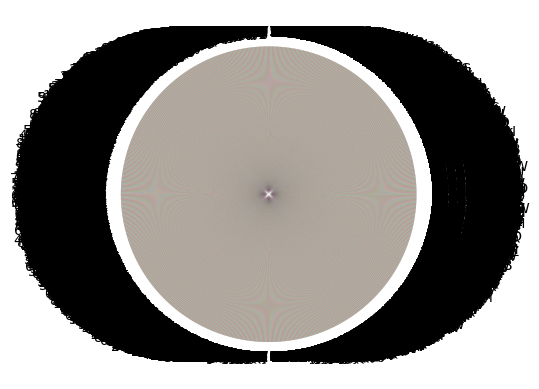

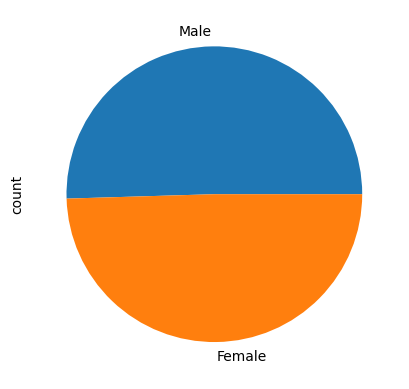

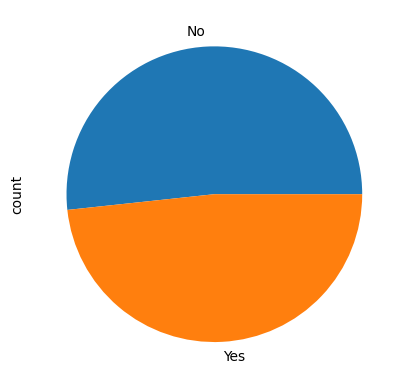

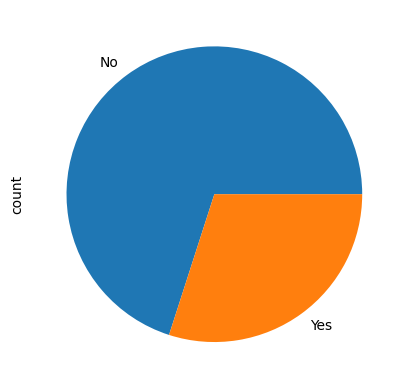

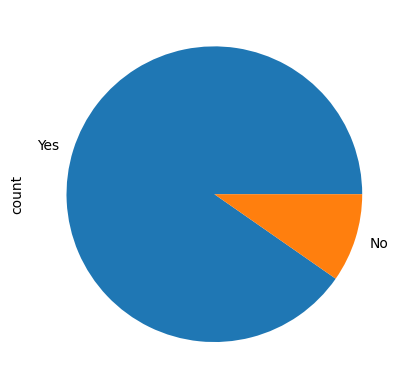

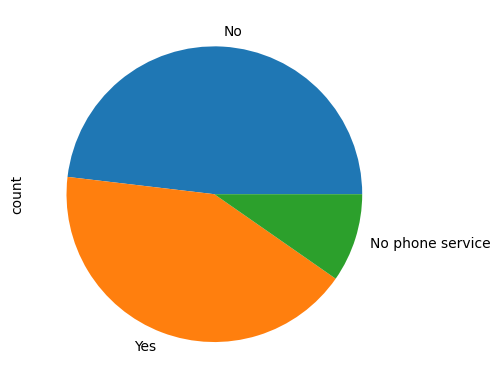

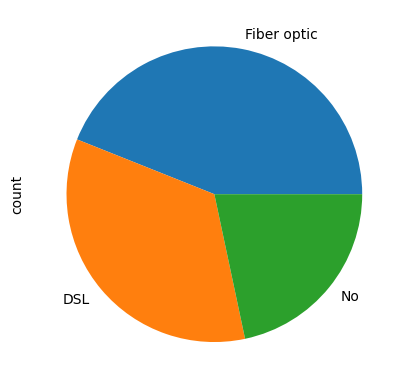

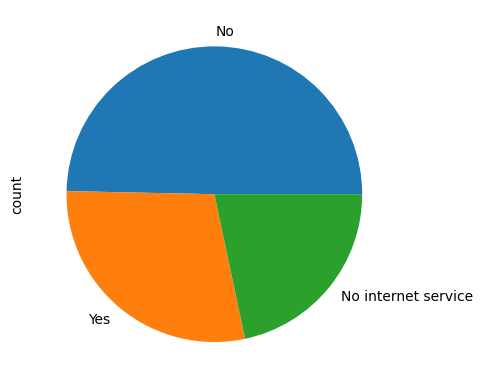

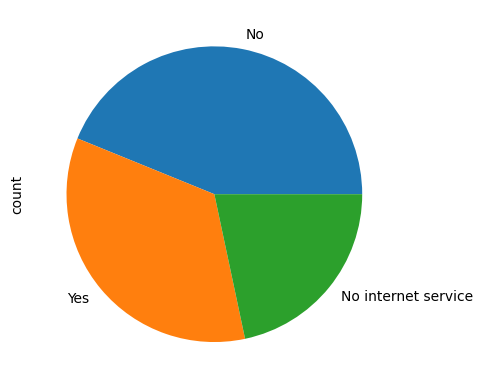

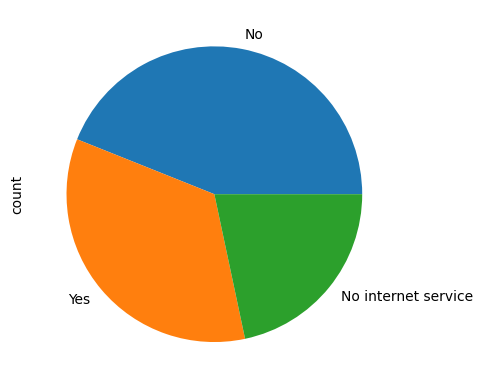

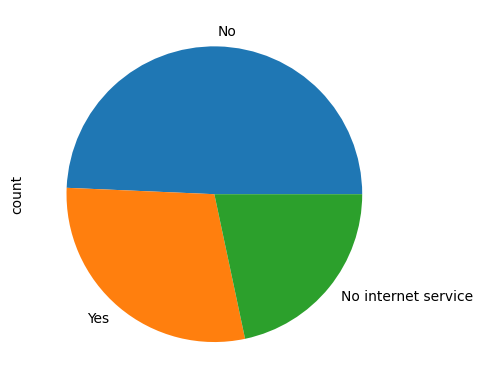

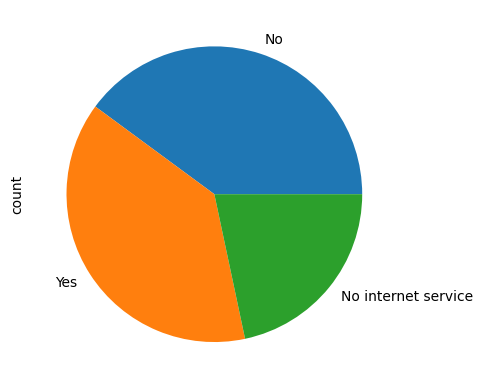

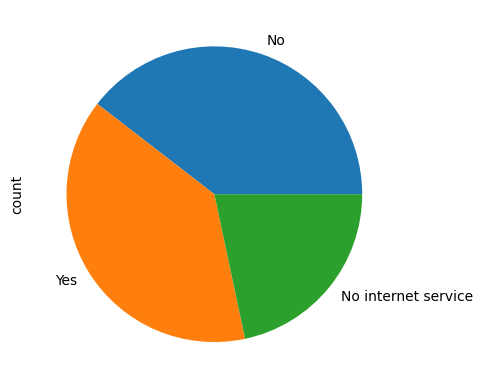

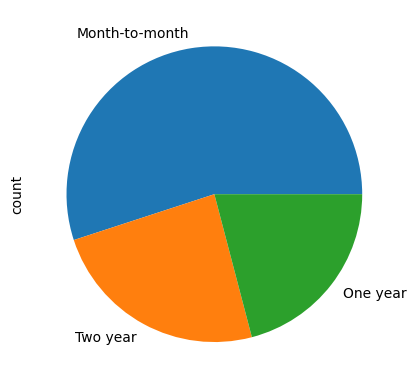

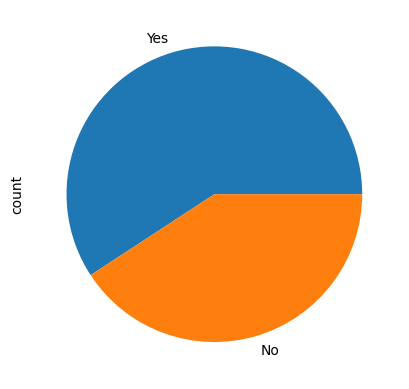

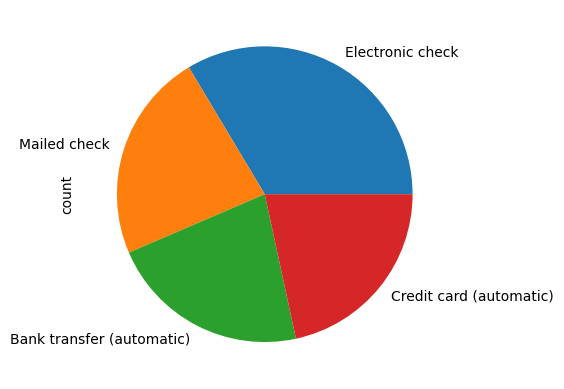

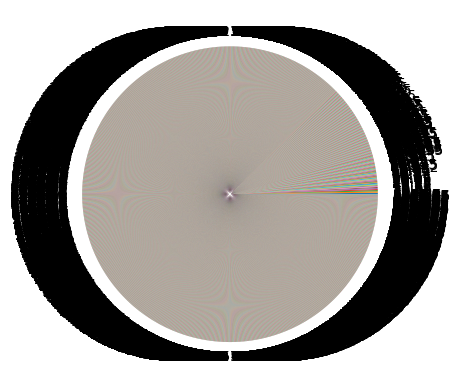

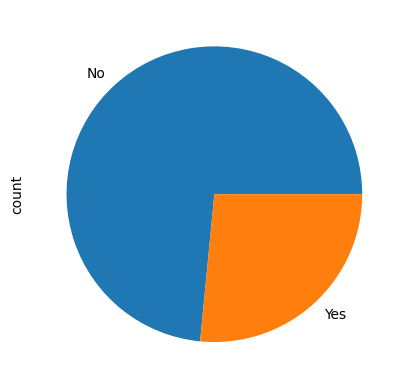

In [18]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie()



  # 2. Counter le nombre de valeurs qu'il y'a dans chaque categorie

### Relation Target / Variables Création des sous-ensembles Churn : Yes et Churn : No

In [19]:
df['Churn'].values

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [21]:
np.where(df[df['Churn'] == 'No'], 0 , 1)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [22]:
churn_yes_df = df[df['Churn'] == 'Yes']


# Créer un dictionnaire de correspondance
mapping = {'Yes': 1, 'No': 0}

# Utiliser la méthode map() pour convertir les valeurs
churn_yes_df['Churn_Yes'] = churn_yes_df['Churn'].astype('object').map(mapping)


churn_yes_df.head()

/tmp/ipykernel_30248/64237941.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_yes_df['Churn_Yes'] = churn_yes_df['Churn'].astype('object').map(mapping)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1


In [23]:
churn_no_df = df[df['Churn'] == 'No']


# Créer un dictionnaire de correspondance
mapping = {'Yes': 1, 'No': 0}

# Utiliser la méthode map() pour convertir les valeurs
churn_no_df['Churn_No'] = churn_no_df['Churn'].astype('object').map(mapping)


churn_no_df.head()

/tmp/ipykernel_30248/2290558363.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_no_df['Churn_No'] = churn_no_df['Churn'].astype('object').map(mapping)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_No
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0


/home/obs/.pyenv/versions/3.12.0/lib/python3.12/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


<Figure size 640x480 with 0 Axes>

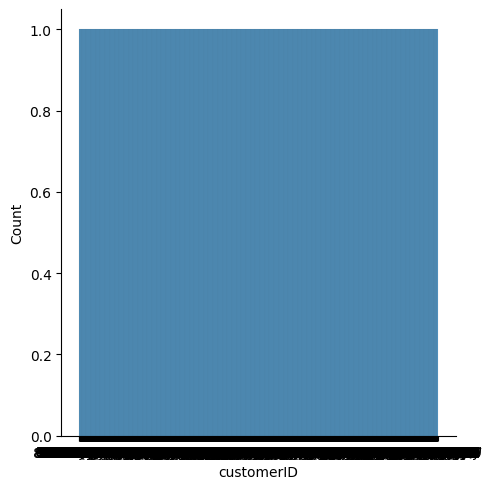

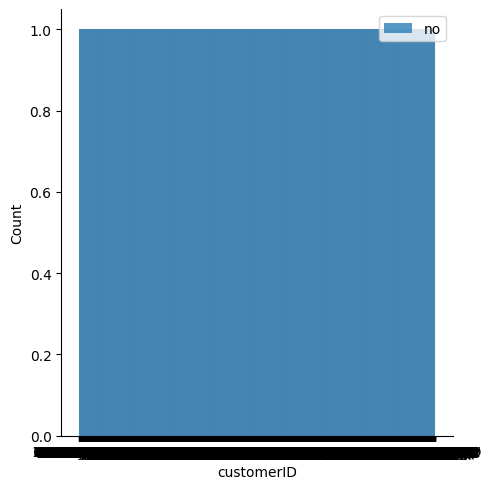

<Figure size 640x480 with 0 Axes>

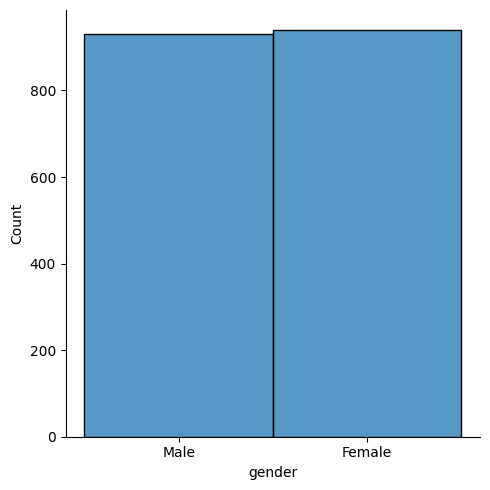

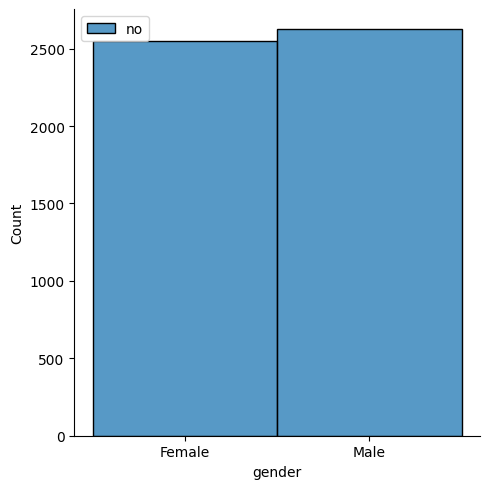

<Figure size 640x480 with 0 Axes>

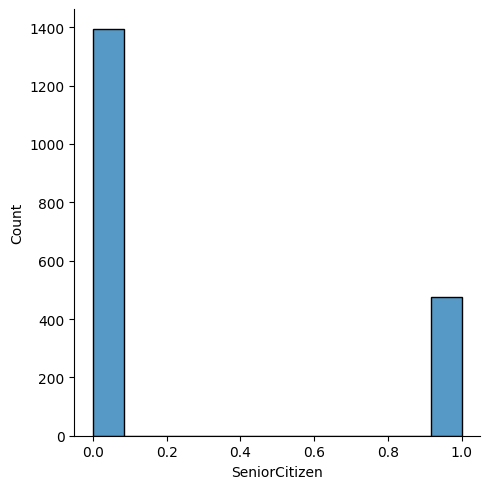

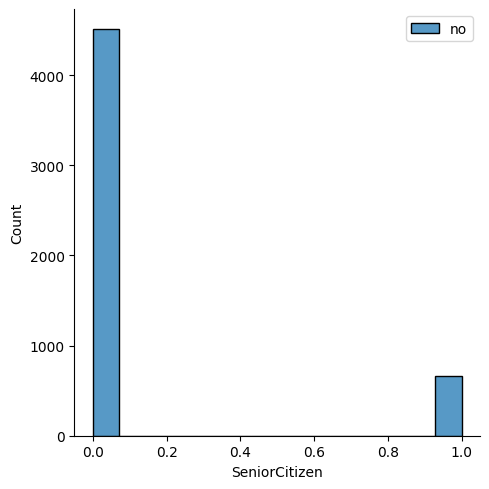

<Figure size 640x480 with 0 Axes>

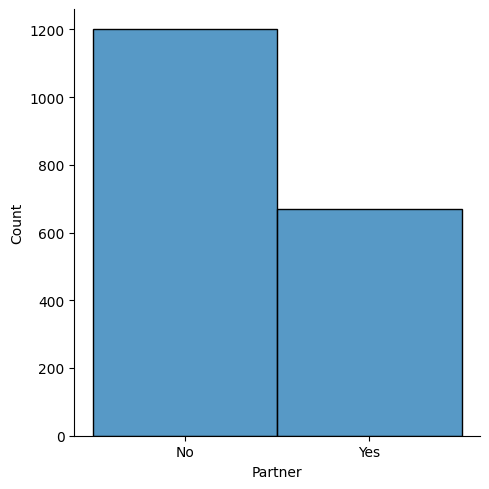

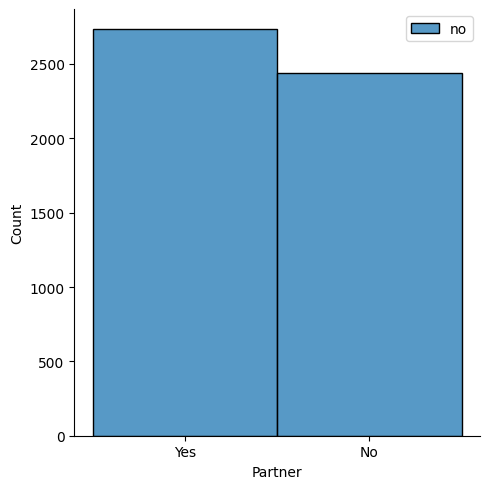

<Figure size 640x480 with 0 Axes>

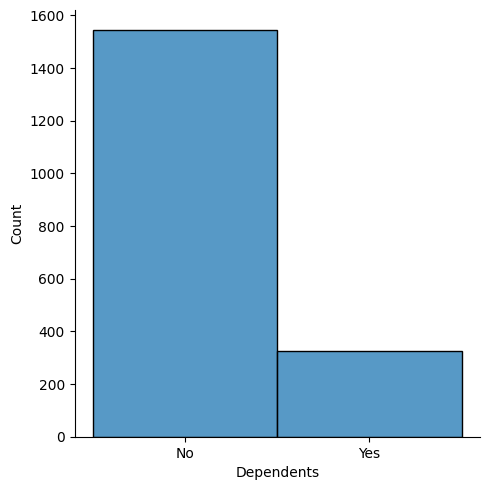

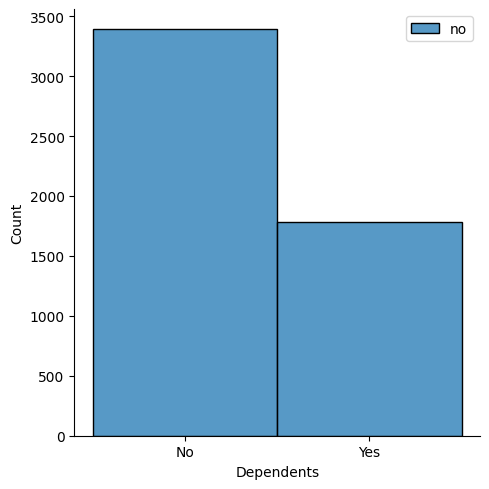

<Figure size 640x480 with 0 Axes>

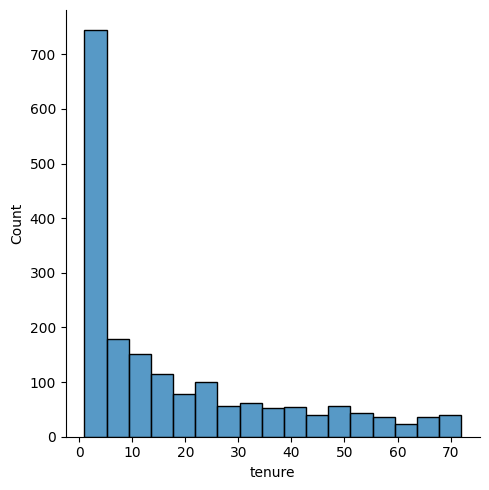

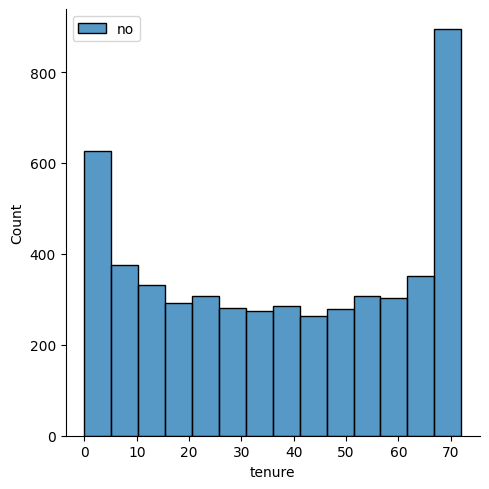

<Figure size 640x480 with 0 Axes>

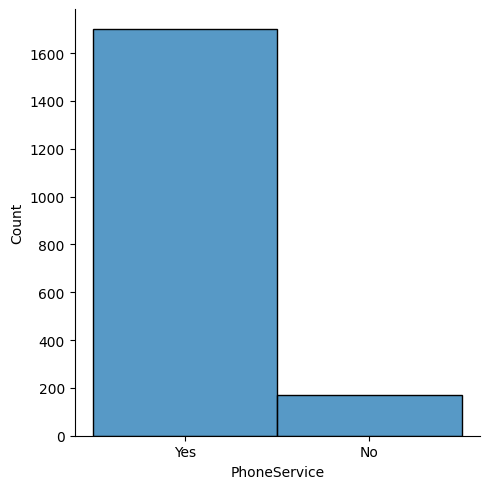

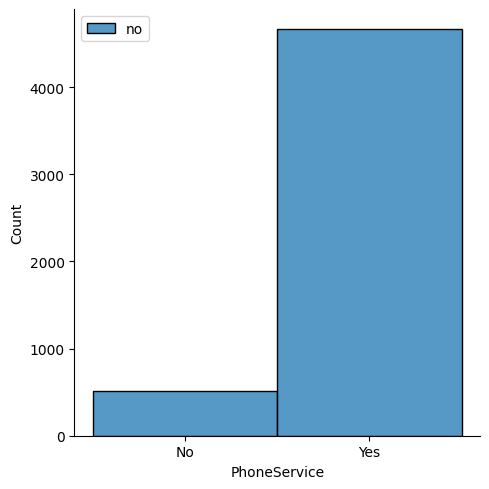

<Figure size 640x480 with 0 Axes>

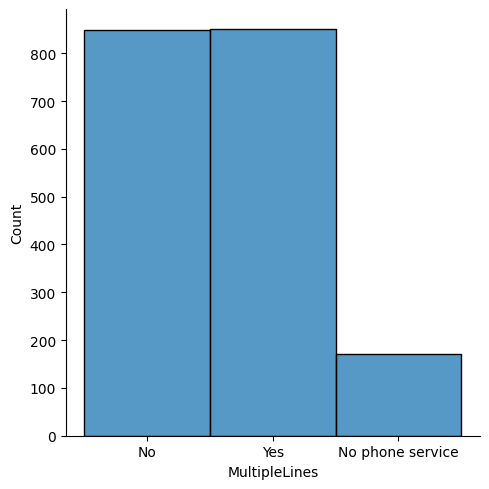

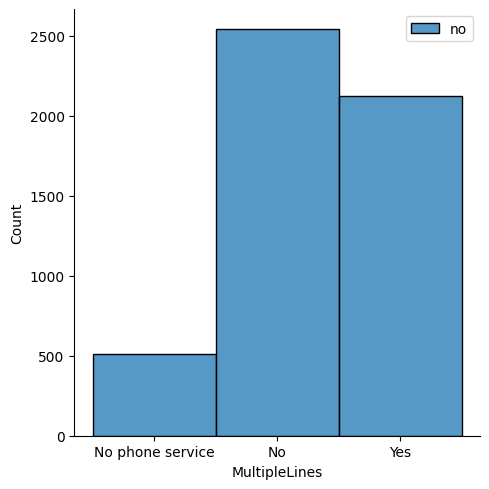

<Figure size 640x480 with 0 Axes>

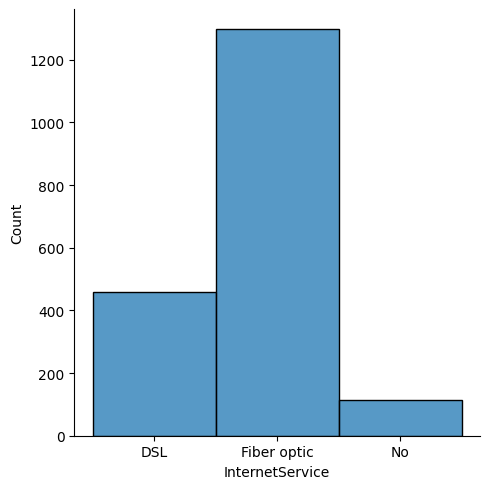

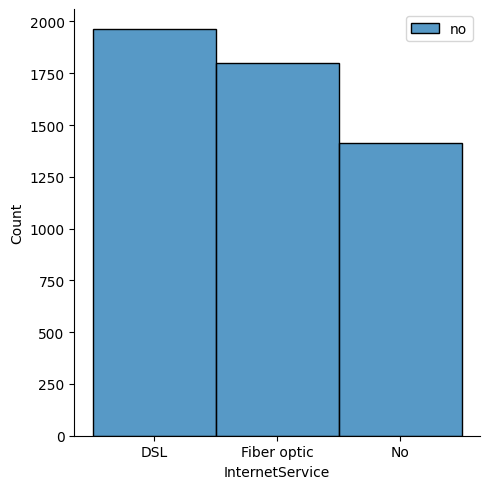

<Figure size 640x480 with 0 Axes>

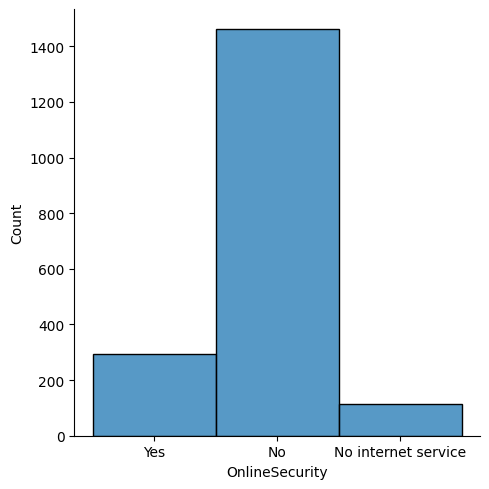

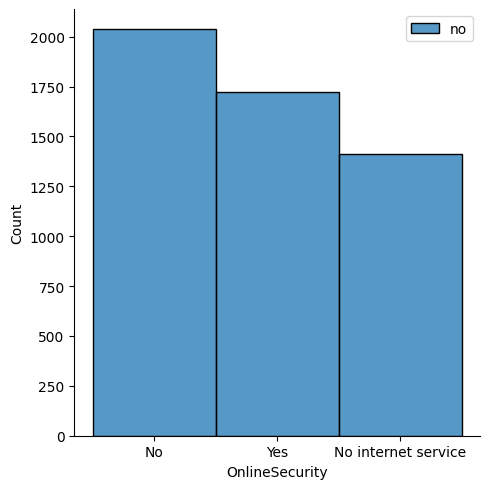

<Figure size 640x480 with 0 Axes>

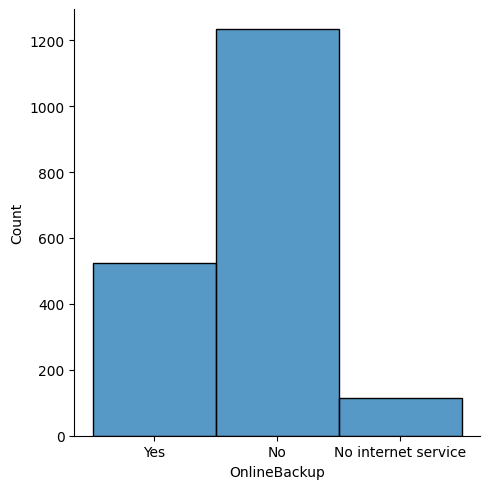

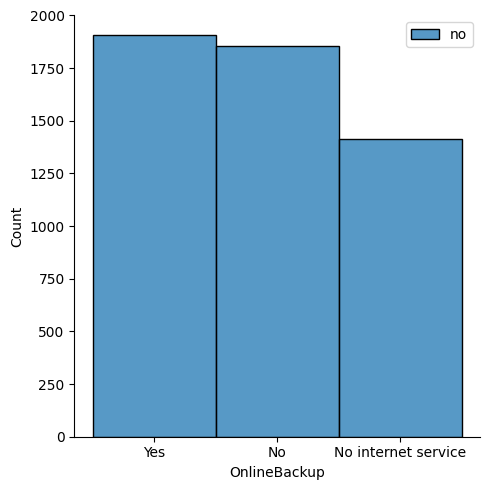

<Figure size 640x480 with 0 Axes>

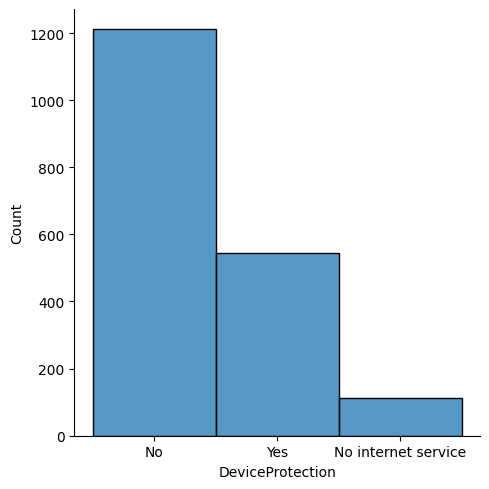

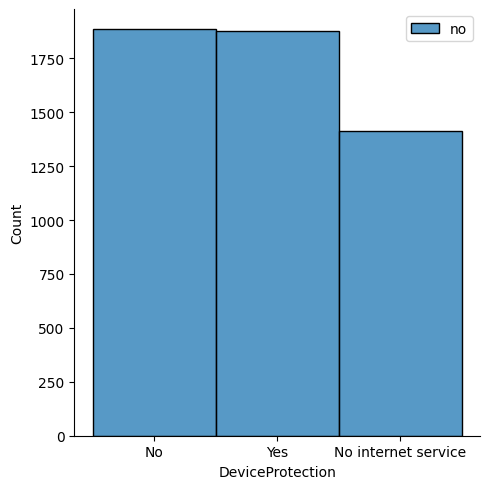

<Figure size 640x480 with 0 Axes>

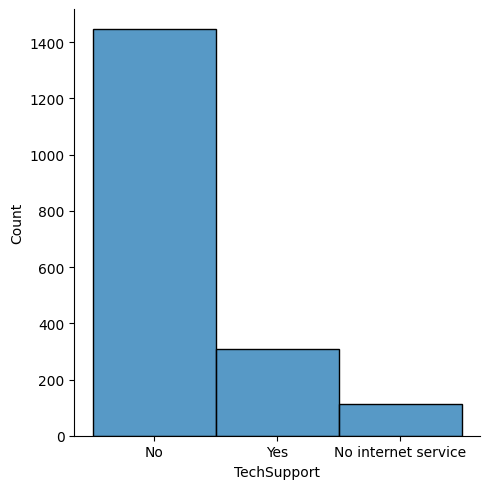

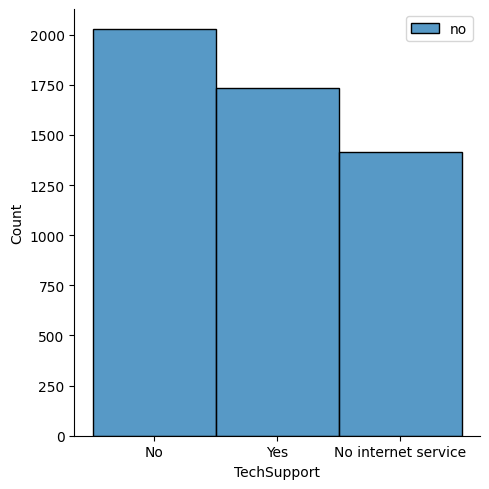

<Figure size 640x480 with 0 Axes>

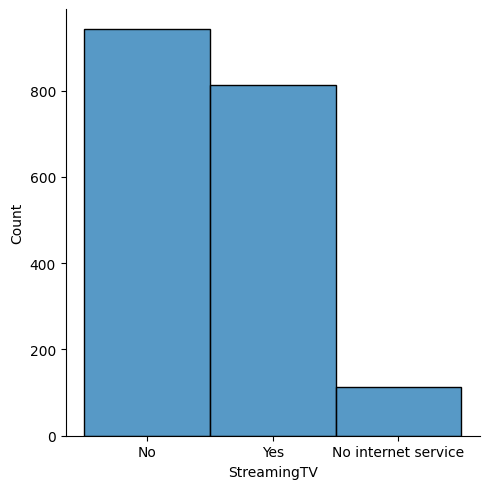

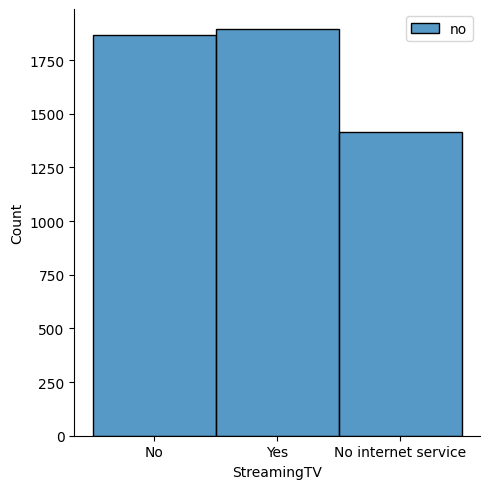

<Figure size 640x480 with 0 Axes>

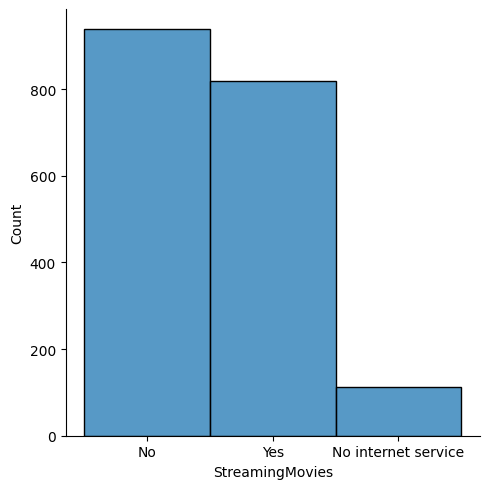

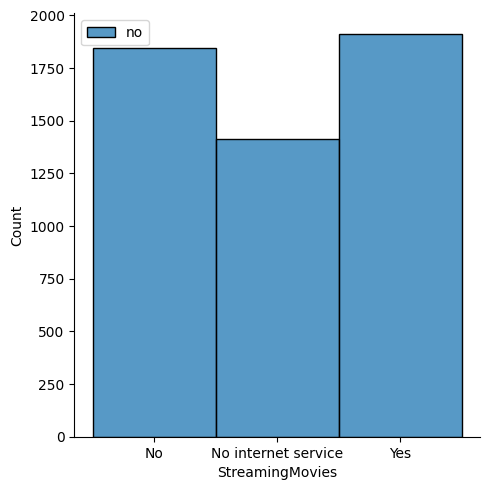

<Figure size 640x480 with 0 Axes>

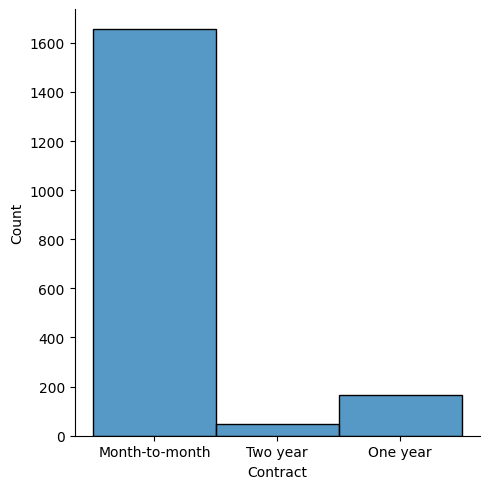

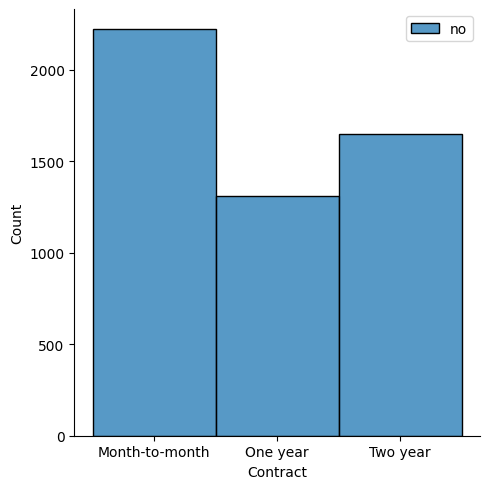

<Figure size 640x480 with 0 Axes>

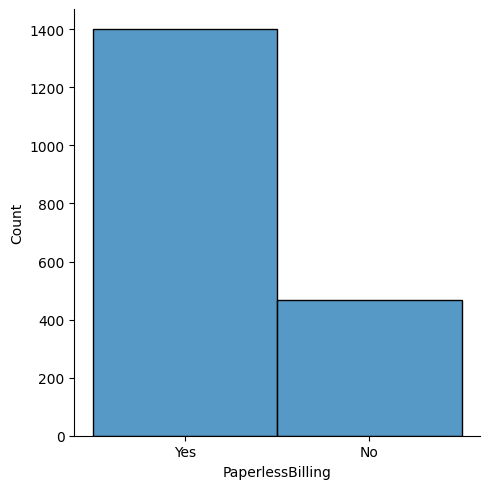

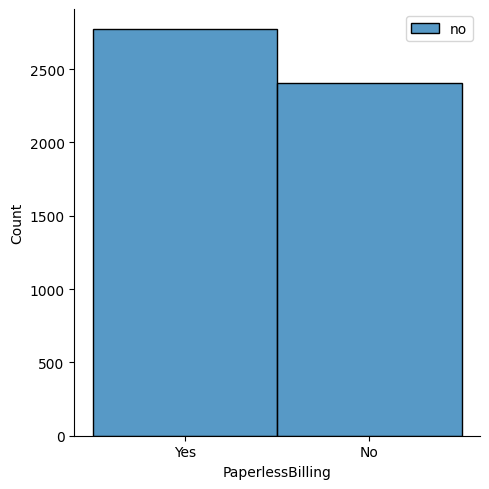

<Figure size 640x480 with 0 Axes>

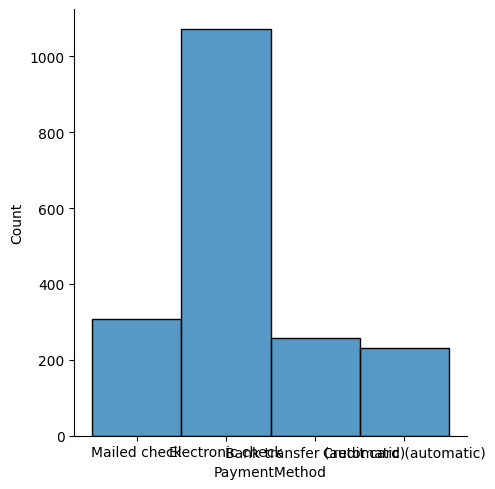

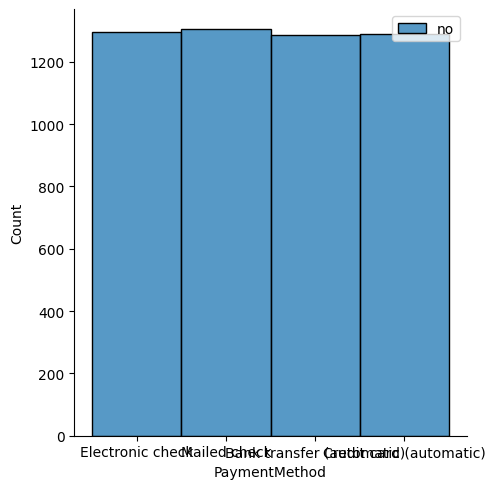

<Figure size 640x480 with 0 Axes>

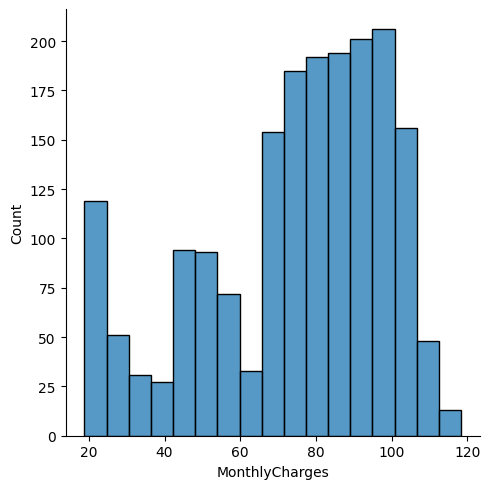

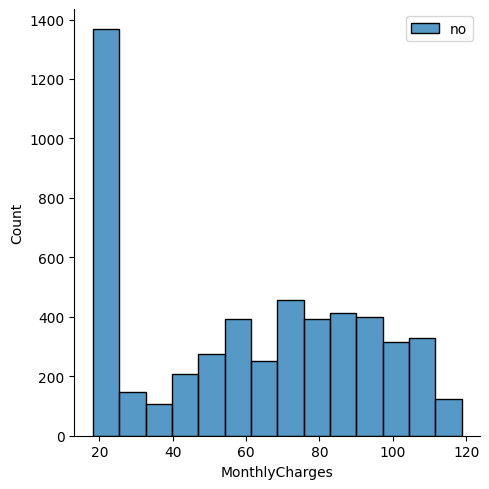

<Figure size 640x480 with 0 Axes>

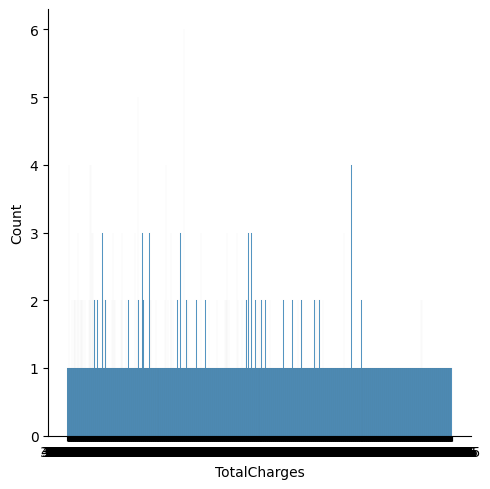

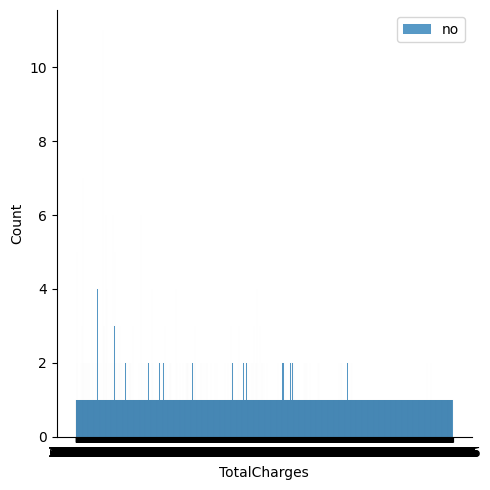

<Figure size 640x480 with 0 Axes>

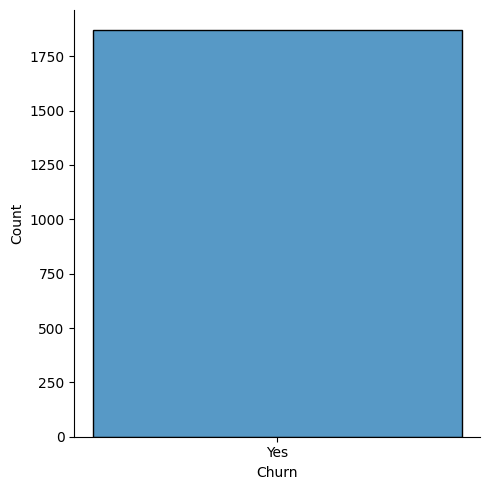

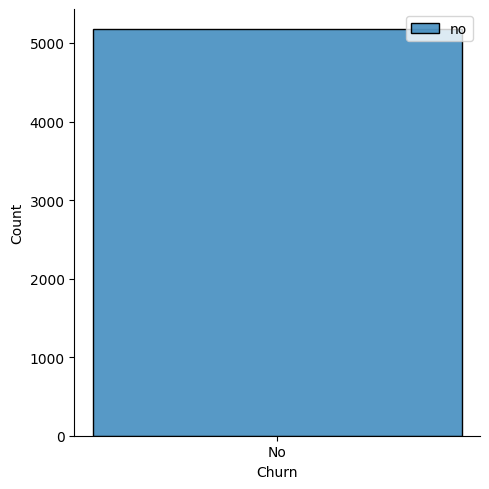

In [24]:
for col in df.columns :
    plt.figure()
    sns.displot(churn_yes_df[col] , label = 'yes')
    sns.displot(churn_no_df[col] , label = 'no')
    plt.legend()

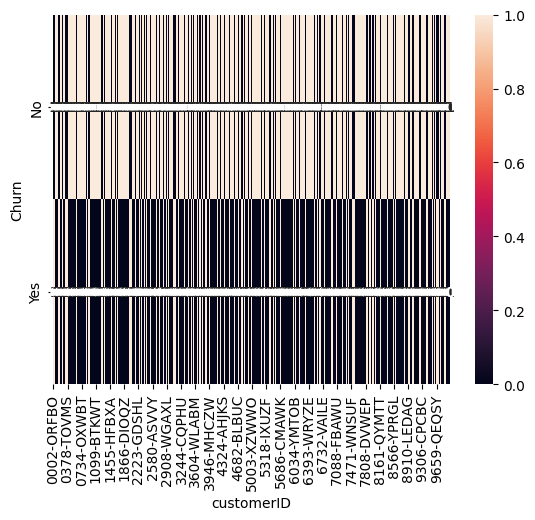

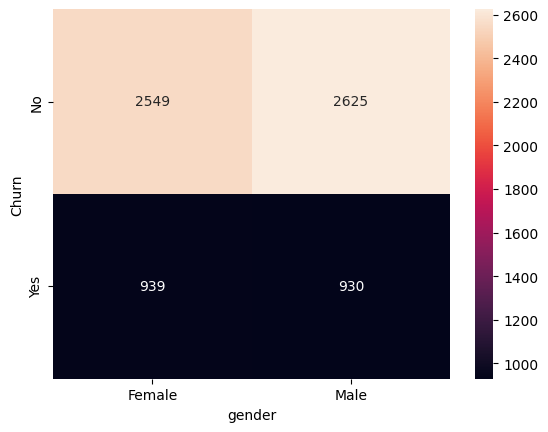

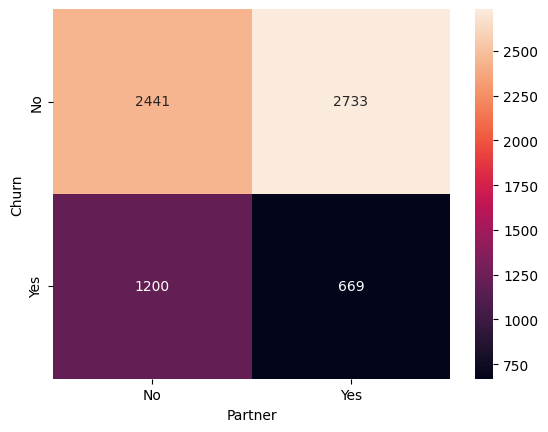

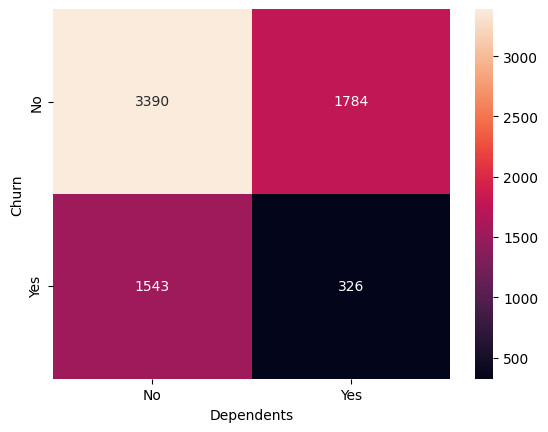

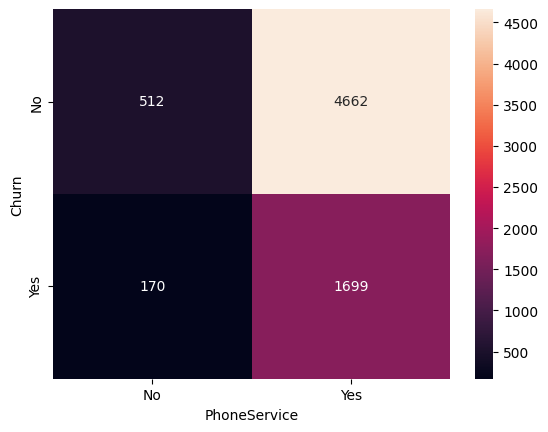

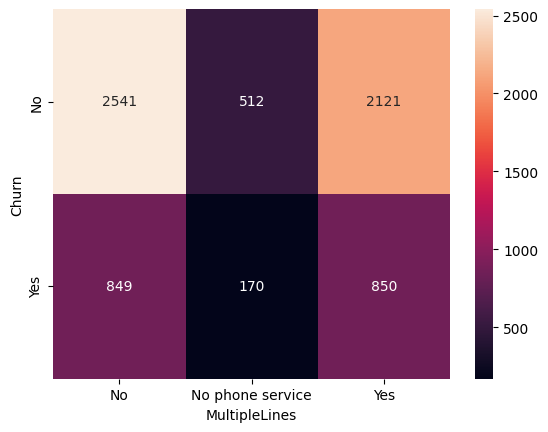

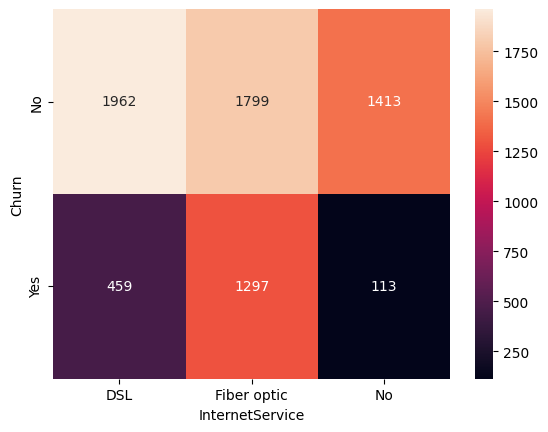

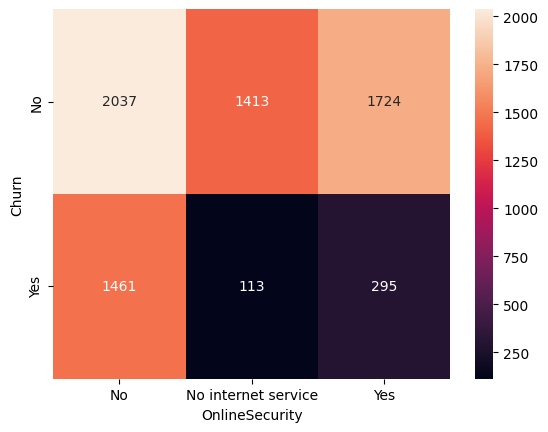

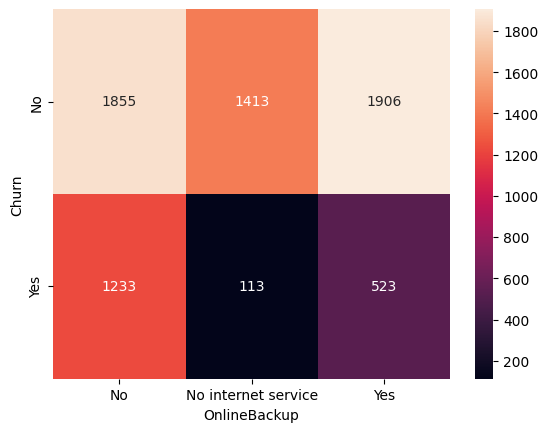

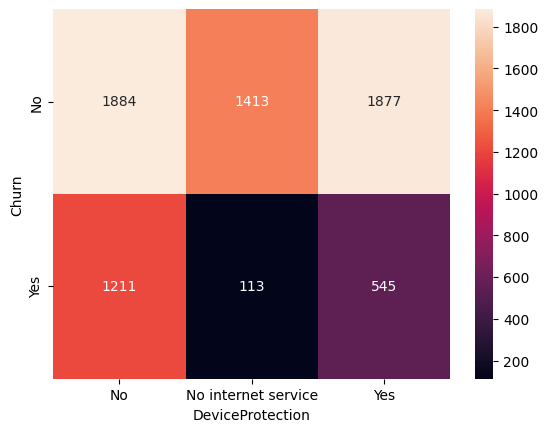

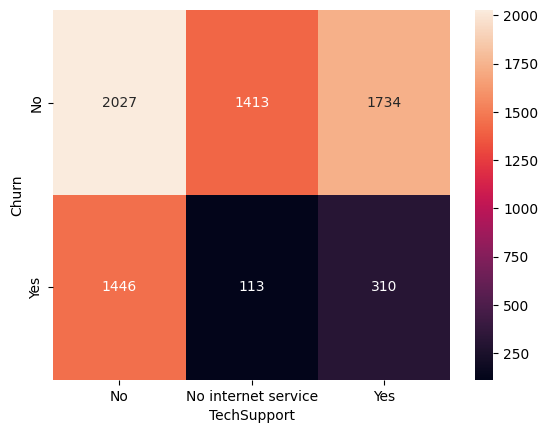

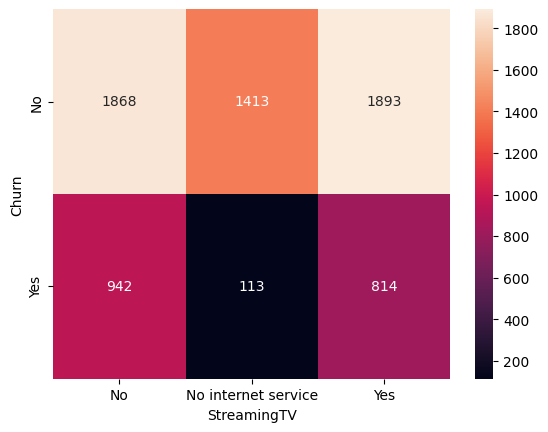

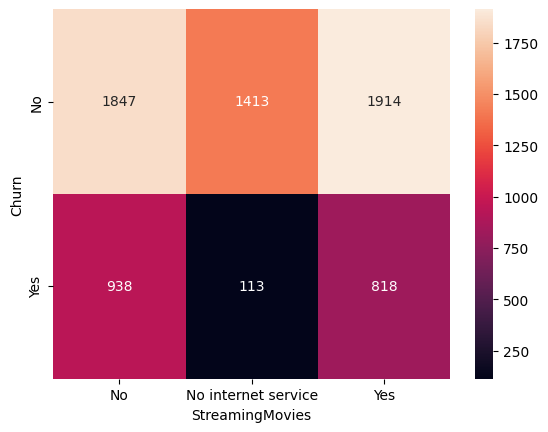

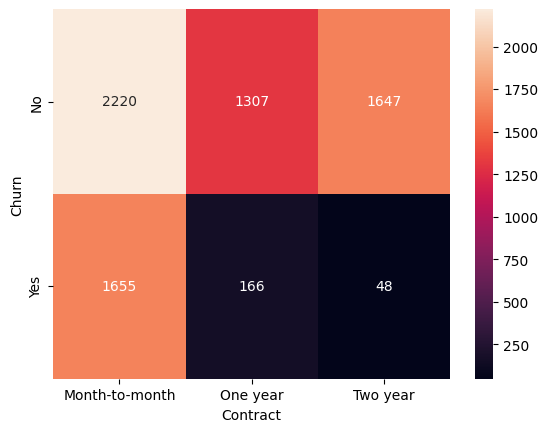

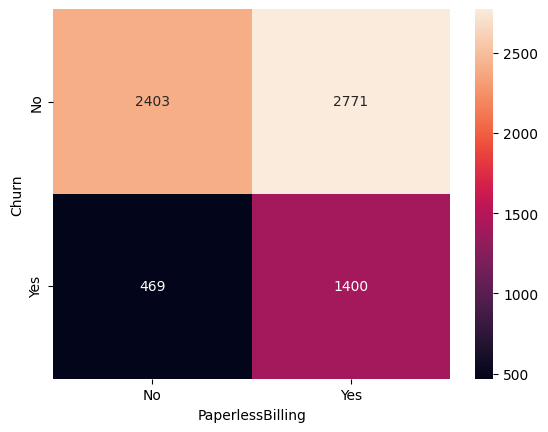

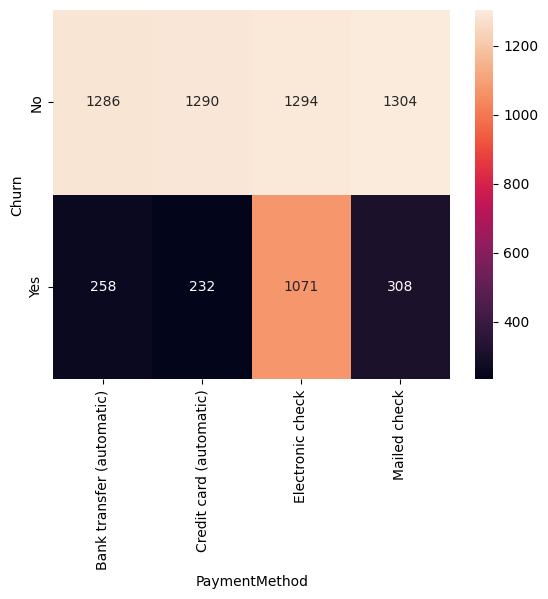

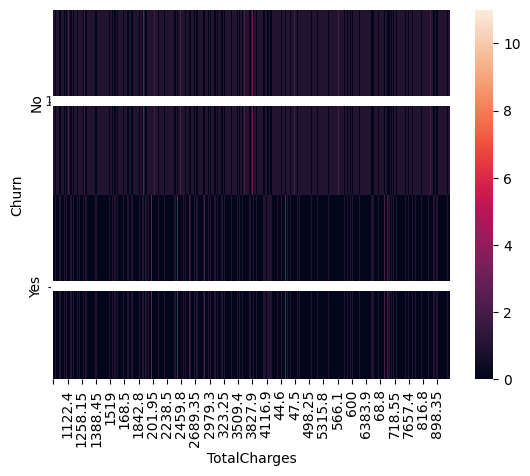

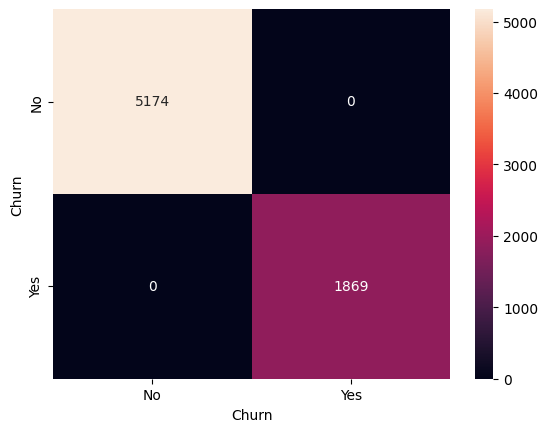

In [25]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['Churn'] , df[col]) , annot=True , fmt='d')

Analyse plus détaillée

In [28]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


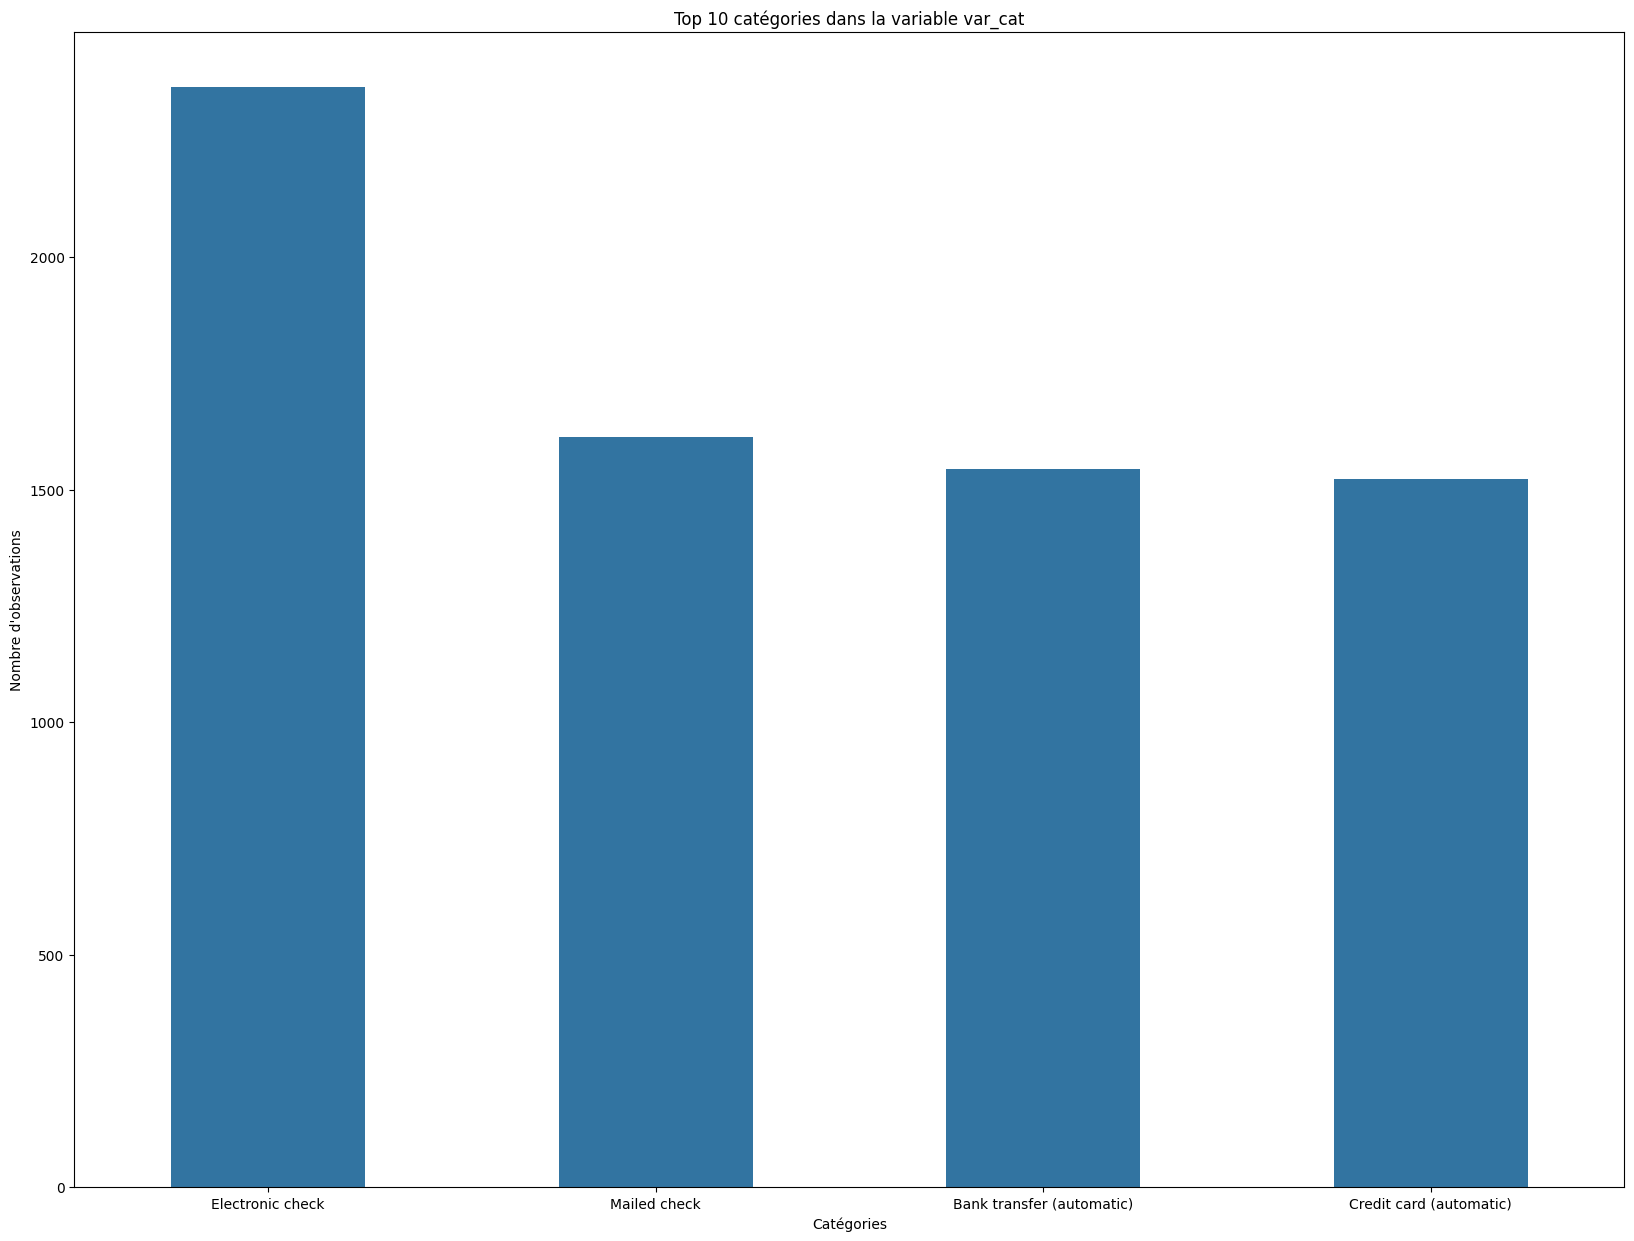

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sélectionne les n premières catégories avec le plus d'occurrences
n = 10
top_cats = df['PaymentMethod'].value_counts().nlargest(n).index.tolist()

# Crée un diagramme à barres des n premières catégories
plt.figure(figsize=(20, 15))
sns.countplot(x='PaymentMethod', data=df, order=top_cats , width=0.5)

# Ajoute des étiquettes pour les axes et le titre
plt.xlabel('Catégories')
plt.ylabel('Nombre d\'observations')
plt.title('Top ' + str(n) + ' catégories dans la variable var_cat')

# Affiche le diagramme à barres
plt.show()